# $\pi^-p$ interactions

In [1]:
filename = "rpp2022-pimp_total.dat"

In [87]:
from utils import read_pdg_data

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
df, meta_data = read_pdg_data(filename)

starting the data


In [49]:
df

,idx,plab,plab_min,plab_max,sig,stats_up,stats_down,sys_up,sys_down
0,1,0.09875,0.09875,0.09875,8.87,0.30,0.30,0.0,0.0
1,2,0.16000,0.16000,0.16000,13.60,1.90,1.90,0.0,0.0
2,3,0.16520,0.16480,0.16560,15.80,0.20,0.20,0.0,0.0
3,4,0.17600,0.17600,0.17600,17.70,0.90,0.90,0.0,0.0
4,5,0.18101,0.17080,0.19101,21.00,8.00,8.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...
600,601,360.00000,359.64001,360.35998,25.25,0.35,0.35,0.0,0.0
601,602,370.00000,370.00000,370.00000,25.25,0.09,0.09,0.4,0.4
602,603,585.00000,585.00000,585.00000,26.00,2.10,2.10,0.0,0.0
603,604,595.00000,595.00000,595.00000,26.40,1.30,1.30,0.0,0.0


In [126]:
df.plab[:14]

0     0.09875
1     0.16000
2     0.16520
3     0.17600
4     0.18101
5     0.18900
6     0.18980
7     0.19100
8     0.20400
9     0.20600
10    0.20930
11    0.21220
12    0.21870
13    0.21885
Name: plab, dtype: float64

In [128]:
import vector

In [131]:
pion = vector.obj(px=0, py=0, pz=0.400, m=0.139570)
proton = vector.obj(px=0, py=0, pz=0, m=0.93827)
sys = pion + proton
sys.mass

1.301855434712355

In [110]:
def down_sample(array, delta=0.01):
    """select the data with a minimum differences between two consecutive values of *delta* values"""
    masks = [1] * len(array)
    last_value = array[0]
    for idx, x in enumerate(array[1:]):
        if x < last_value + delta:
            masks[idx + 1] = 0
        else:
            last_value = x

    return np.array(masks, dtype=bool)

In [121]:
meta_data

{'FILE_NAME': ' PIMP_TOTAL.DAT',
 'REACTION': ' PI- P --> X',
 'BEAM_MASS': '0.139570',
 'TARGET_MASS': '0.938270',
 'THRESHOLD': '0.',
 'FINAL_STATE_MULTIPLICITY': '0',
 'NUMBER_OF_DATA_POINTS': '605'}

In [135]:
plab_to_com(0.4)

1.301855434712355

In [134]:
def plab_to_com(plab: np.ndarray, m_beam: float = 0.139570, m_target: float = 0.938270):
    return np.sqrt((m_target + np.sqrt(m_beam ** 2 + plab ** 2)) ** 2 - plab**2)

In [111]:
masks = down_sample(df.plab)

In [113]:
df.plab.values[masks].shape

(258,)

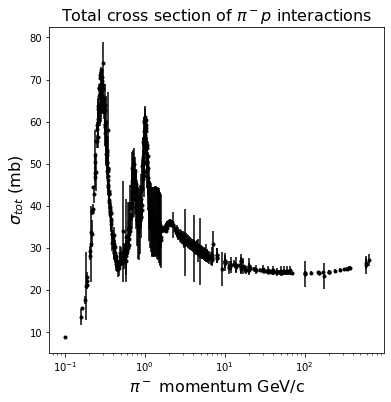

In [138]:
_, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.errorbar(df.plab, df.sig, yerr=[df.error_down, df.error_up], fmt=".", c='k')
ax.set_xscale('log')
ax.set_xlabel("$\pi^-$ momentum GeV/c", fontsize=16)
ax.set_ylabel("$\sigma_{tot}$ (mb)", fontsize=16)
plt.title("Total cross section of $\pi^-p$ interactions", fontsize=16)
plt.savefig("pi_minus_p_tot.pdf")

In [86]:
meta_data = dict(zip(meta_keys, meta_values))
meta_data

{'FILE_NAME': ' PIMP_TOTAL.DAT',
 'REACTION': ' PI- P --> X',
 'BEAM_MASS': '0.139570',
 'TARGET_MASS': '0.938270',
 'THRESHOLD': '0.',
 'FINAL_STATE_MULTIPLICITY': '0',
 'NUMBER_OF_DATA_POINTS': '605'}

In [13]:
            if "FORMAT" in line:
                data_formats = line.replace("FORMAT(","").replace(")", "").split(",")
            else:
                meta_keys += line[:-1].split()